In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.shape


(1000, 3)

In [ ]:
df.sample(5)

,cgpa,placement_exam_marks,placed
231,6.40,35.0,0
300,7.36,52.0,1
51,6.24,28.0,1
865,6.77,16.0,0
369,6.69,36.0,1


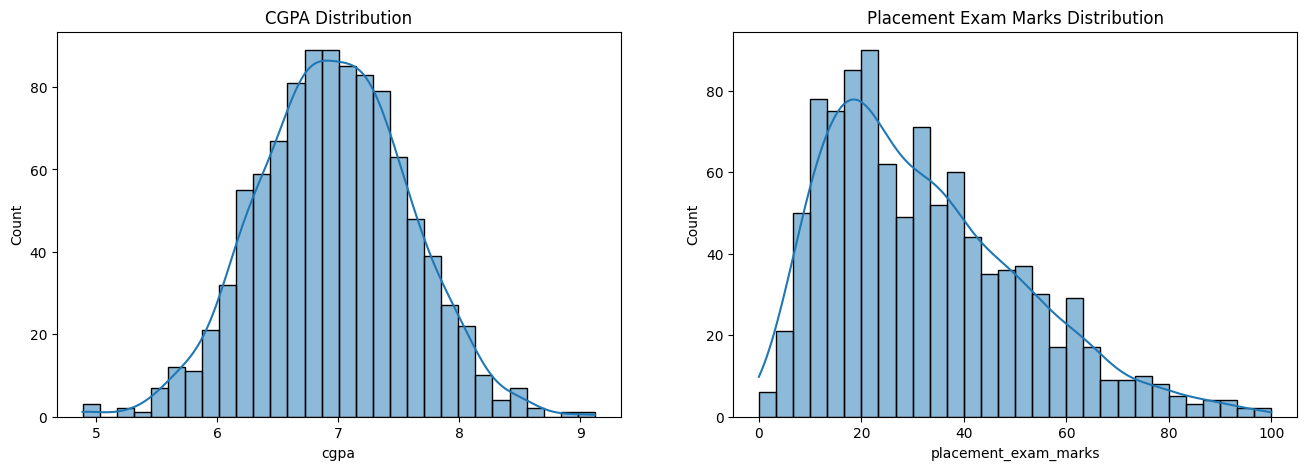

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# 1st subplot: CGPA
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, bins=30)  # bins optional, adjust kar sakte ho
plt.title('CGPA Distribution')

# 2nd subplot: Placement Exam Marks
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, bins=30)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [ ]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [ ]:
#finding boundaries values
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [ ]:
# Finding the outliers
df[(df['cgpa']>8.80)|df['cgpa']<5.11]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
#calculate Zscore (2nd approach )
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_Zscore,cgpa_zscore
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371


In [ ]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore,cgpa_zscore
995,8.87,44.0,1,3.099150,3.099150
996,9.12,65.0,1,3.505062,3.505062


In [ ]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore,cgpa_zscore
485,4.92,44.0,1,-3.314251,-3.314251
997,4.89,34.0,0,-3.362960,-3.362960
999,4.90,10.0,1,-3.346724,-3.346724


In [ ]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore,cgpa_zscore
485,4.92,44.0,1,-3.314251,-3.314251
995,8.87,44.0,1,3.099150,3.099150
996,9.12,65.0,1,3.505062,3.505062
997,4.89,34.0,0,-3.362960,-3.362960
999,4.90,10.0,1,-3.346724,-3.346724


In [ ]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [ ]:
new_df


,cgpa,placement_exam_marks,placed,cgpa_Zscore,cgpa_zscore
0,7.19,26.0,1,0.371425,0.371425
1,7.46,38.0,1,0.809810,0.809810
2,7.54,40.0,1,0.939701,0.939701
3,6.42,8.0,1,-0.878782,-0.878782
4,7.23,17.0,0,0.436371,0.436371
...,...,...,...,...,...
991,7.04,57.0,0,0.127878,0.127878
992,6.26,12.0,0,-1.138565,-1.138565
993,6.73,21.0,1,-0.375452,-0.375452
994,6.48,63.0,0,-0.781363,-0.781363


CAPPING

In [ ]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [ ]:
lower_limit

np.float64(5.113546374602832)

In [ ]:
df['cgpa']=np.where(df['cgpa']>upper_limit,
                    upper_limit,
                    np.where(df['cgpa']<lower_limit,
                          lower_limit,
                           df['cgpa']
                             ))

In [ ]:
df.shape

(1000, 5)

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
